<a href="https://colab.research.google.com/github/pemba007/house-ml/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install imbalanced-learn
!pip install xgboost

In [31]:
# Ignoring the warning
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Importing required libaries

# Data handling libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')

In [34]:
df.shape

(284807, 31)

In [35]:
# Separating the target variable
y = df['Class']
df.drop(columns=['Class'], inplace = True)

# Exploraratory Data Analysis(EDA)

In [36]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

Text(0, 0.5, 'Frequency')

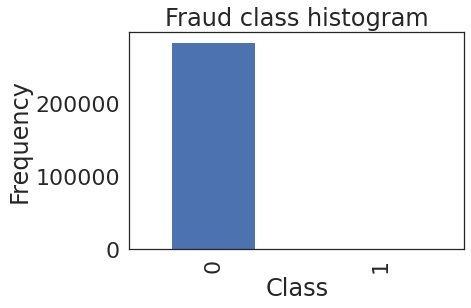

In [37]:
# Checking the distribution for target variable
count_classes = pd.value_counts(y, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Here we find data imbalance between different number of records between the fraudulent and non-fraudulent records. 

In [38]:
# # Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print("Before sampling y:", Counter(y))
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
df, y = undersample.fit_resample(df, y)
print("After sampling y:", Counter(y))

Before sampling y: Counter({0: 284315, 1: 492})
After sampling y: Counter({0: 492, 1: 492})


In [39]:
# # Oversampling
# from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler()
# print("Before sampling y:", Counter(y))
# # fit and apply the transform
# df, y = oversample.fit_resample(df, y)
# print("After sampling y:", Counter(y))

Text(0, 0.5, 'Frequency')

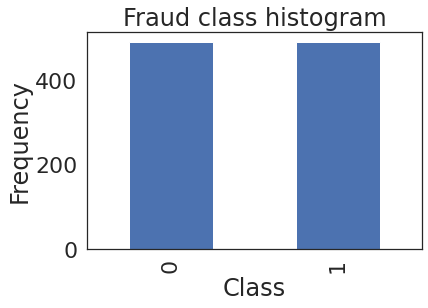

In [40]:
# Checking the distribution for target variable
count_classes = pd.value_counts(y, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Checking distributions

In [41]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.00000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87361.15752,-2.327436,1.824364,-3.513251,2.309391,-1.554406,-0.687471,-2.789512,0.306683,-1.262774,...,0.178150,0.353051,-0.010996,-0.014747,-0.057044,0.008189,0.034716,0.081883,0.022161,99.306138
std,48031.33838,5.532335,3.633803,6.214910,3.156824,4.192777,1.746762,5.838345,4.849905,2.320530,...,1.058315,2.797615,1.161411,1.148361,0.579840,0.657788,0.476785,1.014045,0.499127,210.653743
min,406.00000,-30.552380,-9.554655,-31.103685,-3.587216,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-7.642808,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.235358,-7.263482,-8.307955,0.000000
25%,44754.75000,-2.865037,-0.194877,-5.113334,-0.006134,-1.746514,-1.582428,-3.066415,-0.215690,-2.294075,...,-0.194764,-0.166607,-0.520341,-0.226319,-0.399055,-0.317168,-0.282458,-0.064104,-0.058243,1.180000
50%,79385.50000,-0.754627,0.936346,-1.372153,1.315090,-0.424141,-0.637816,-0.670128,0.158577,-0.665517,...,0.023113,0.142305,-0.002271,-0.030715,-0.001706,0.029540,-0.007291,0.040192,0.033276,16.990000
75%,134118.75000,1.036985,2.793742,0.316300,4.230724,0.509261,0.094818,0.237468,0.877002,0.193470,...,0.444010,0.647478,0.544074,0.188975,0.360319,0.377280,0.337588,0.454884,0.209627,99.990000
max,172488.00000,2.308733,22.057729,3.220148,12.114672,11.095089,6.474115,5.802537,20.007208,5.099522,...,11.059004,27.202839,8.361985,5.466230,3.101012,2.208209,2.745261,4.610936,1.779364,2125.870000


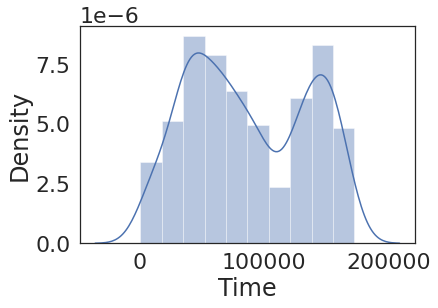

In [42]:
sns.distplot(df['Time'])

In [43]:
# Amount Feature
df['Amount'].describe()

count     984.000000
mean       99.306138
std       210.653743
min         0.000000
25%         1.180000
50%        16.990000
75%        99.990000
max      2125.870000
Name: Amount, dtype: float64

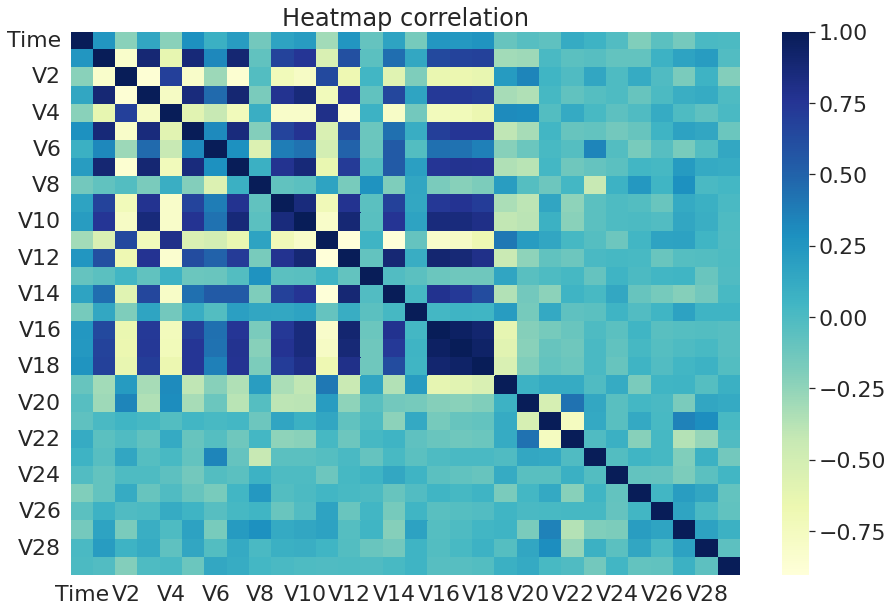

In [44]:
# Checking correlation
df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

Not much correlation can be found between the features

#Preprocessing

In [45]:
# Checking the datasets
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,40531.0,-0.256903,0.351553,0.765094,-1.252797,-0.128172,-1.138525,0.573774,-0.291202,-1.989618,...,-0.418443,-0.172059,-0.080650,0.003239,0.585214,-0.714218,0.875915,-0.057441,0.174273,9.00
1,80925.0,1.027682,-0.074904,-0.037982,1.272072,0.235515,0.349638,0.246575,-0.040046,0.202184,...,0.100446,-0.084957,-0.190716,-0.266584,-0.728946,0.767412,-0.274021,0.025447,0.027034,110.15
2,39377.0,-0.919926,0.005612,1.759448,0.462412,0.020553,-0.661267,0.354588,-0.037672,-0.755089,...,0.571475,0.233806,0.453567,0.078851,0.498786,0.032896,1.392697,-0.032494,0.082537,94.95
3,143079.0,-0.627535,-0.655336,0.917104,2.244636,1.492812,0.513557,-0.853869,0.518132,0.108563,...,0.434123,-0.275086,-0.904262,0.463707,0.046730,-1.195644,-0.789808,0.286492,0.268280,10.74
4,144490.0,-1.110356,1.160035,-1.802748,-1.449006,1.759889,-0.885924,1.595724,-0.319065,0.480971,...,0.319036,-0.015753,0.564552,-0.424589,-0.276465,-0.050928,0.078965,0.266342,-0.019936,30.82


We know that time and amount feature requires normalization from the previous analysis

In [46]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

## Splitting dataset

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify = y)
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

### Checking distribution after split

In [48]:
unique, counts = np.unique(y_train, return_counts=True)

result = np.column_stack((unique, counts)) 
print(result)

[[  0 393]
 [  1 394]]


In [49]:
unique, counts = np.unique(y_test, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[ 0 99]
 [ 1 98]]


# Implementing algorithms

In [50]:
# Libraries for metrics for all algorithms
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

# Library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## Implementing Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

## Hyper parameter tuning

In [52]:
parameters = {'C':[1, 10], 'solver' : ('newton-cg', 'lbfgs', 'liblinear')}

clf = GridSearchCV(logReg, parameters, n_jobs=-1, scoring="roc_auc", verbose = 5)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')},
             scoring='roc_auc', verbose=5)

In [53]:
clf.best_params_

{'C': 1, 'solver': 'lbfgs'}

In [54]:
# Predicting with the best parameters
y_pred = clf.predict(X_test)

### Metrics for Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



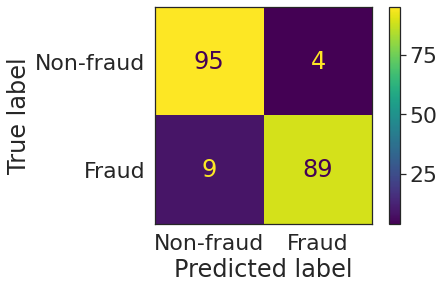

In [55]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Support Vector Machine

---



In [56]:
from sklearn.svm import SVC

svm = SVC()

### Hyperparameter Tuning

In [57]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5]}

clf = GridSearchCV(svm, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5], 'kernel': ('linear', 'rbf')},
             scoring='roc_auc')

In [58]:
# Predicting with the best parameters
y_pred = clf.predict(X_test)

## Metrics for Support Vector Machine

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.99      0.89      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



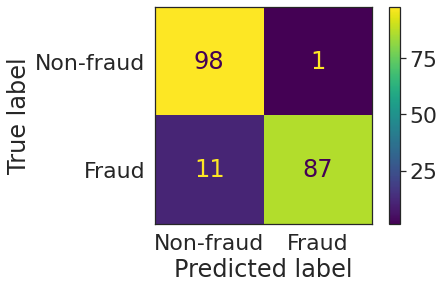

In [59]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### Training the model

In [61]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

## Metrics for Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.85      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



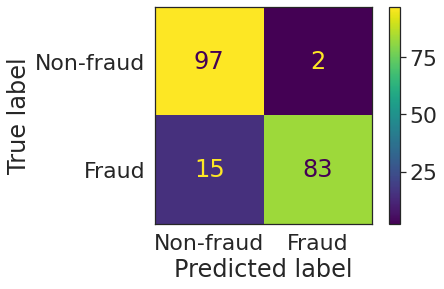

In [62]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Random Forest



In [63]:
from sklearn.ensemble import RandomForestClassifier

rdc = RandomForestClassifier(n_jobs=-1, max_depth = 20, verbose = 1)

## Hyperparameter Tuning

In [64]:
parameters = {'n_estimators':[100, 150]}

clf = GridSearchCV(rdc, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=20, n_jobs=-1,
                                              verbose=1),
             n_jobs=-1, param_grid={'n_estimators': [100, 150]},
             scoring='roc_auc')

## Metrics for Random Forest

In [65]:
clf.best_params_

{'n_estimators': 150}

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.85      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



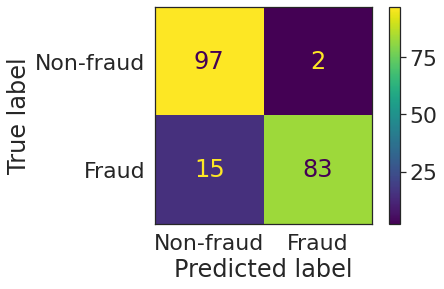

In [66]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Artificial Neural Network

In [67]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 300)

In [68]:
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(clf, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='roc_auc')

In [69]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

## Metrics for Artificial Neural Network

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.85      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



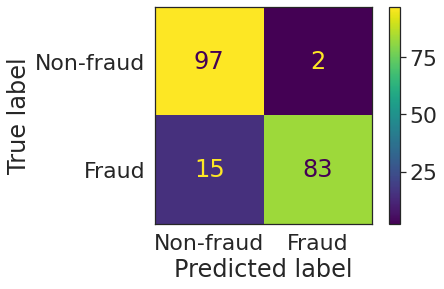

In [70]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

# Implementing XGBoost CLassifier

In [71]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective="binary:logistic")

clf.fit(X_train, y_train)


XGBClassifier()

## Hyperparameter Tuning

In [72]:
parameters = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

clf = GridSearchCV(clf, parameters, n_jobs=-1, scoring="roc_auc")


## Metrics for XGBoost Classifier

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.85      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



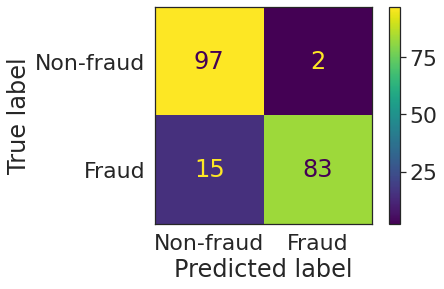

In [73]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()